# Projeto 2 - NLP


Os segundo projeto do módulo de Machine Learning será focado no processamento de linguagem natural! Usaremos os algoritmos aprendidos e as técnicas vistas na segunda parte do curso para extrairmos informações relevantes de texto. Mais precisamente, de publicações no Twitter.

## Os Dados

Utilizaremos um Dataset obtido do Twitter com 100K postagens entre os dias 01/08/2018 e 20/10/2018. Cada postagem é classificada como **positiva**, **negativa** ou **neutra**.  

Dois arquivos serão disponilizados para o desenvolvimento dos modelos, um para treino/validação e outro para submissão. Os arquivos se encontram na pasta */Dados/train* e */Dados/subm*, respectivamente.

Descrição das colunas:

- **id**: ID único para o tweet  
- **tweet_text**: Texto da publicação no Twitter  
- **tweet_date**: Data da publicação no Twitter  
- **sentiment**: 0, se negativo; 1, se positivo; 2, se neutro  
- **query_used**: Filtro utilizado para buscar a publicação

## O Problema

Você deverá desenvolver um modelo para detectar o sentimento de uma publicação do Twitter a classificando em uma das três categorias: **positiva**, **negativa** ou **neutra**. O texto da publicação está disponível na coluna "tweet_text". Teste e compare a melhor técnica para o processamento do texto e escolha a métrica de avaliação que julgar mais pertinente.  

Escolha o melhor modelo e pratique simular novas previsões utilizando uma base a partir dos dados de submissão, que estão no caminho ```Dados/subm/Subm3Classes.csv```.

Para ajudar no desenvolvimento, é possível dividir o projeto em algumas fases:

- **Análise de consistência dos dados**: analise se os dados estão fazendo sentido, se os campos estão completos e se há dados duplicados ou faltantes. Se julgar necessário, trate-os.    


- **Análise exploratória**: analise a sua base como um todo, verifique o balanceamento entre as classes e foque, principalmente, na coluna ```tweet_text```.    


- **Pré-processamento e transformações**: projetos de NLP exigem um considerável pré-processamento. Foque no tratamento da string do texto. Procure começar com tratamentos simples e adicione complexidade gradualmente. Nessa etapa você testará diferentes técnicas de transformações.    


- **Treinamento do modelo**: depois das transformações, você poderá executar o treinamento do modelo classificador. Nessa etapa o problema se torna semelhante aos abordados na primeira parte do módulo. Você pode testar diversos classificadores como RandomForest, AdaBoost, entre outros. Otimize os hiperparâmetros do modelo com técnicas como a GridSearch e a RandomizedSearch. 


- **Simulação dos dados em produção**: Após o modelo treinado e levantada os melhores ajustes, vocÊs irão simular classificar dados em produção, onde deve ser desenvolvido um pipeline para tratar dados novos e devolver a resposta para esses novos dados.


- **Conclusões**: descreva, em texto, as conclusões sobre os seus estudos. O modelo é capaz de identificar o sentimento das publicações? É possível extrapolar o modelo para outros contextos, como a análise de sentimento de uma frase qualquer? Pense em questões pertinentes e relevantes que você tenha obtido durante o desenvolvimento do projeto!     

## Critérios de avaliação

Os seguintes itens serão avaliados:

1. Desenvolvimento das etapas descritas acima;


2. Reprodutibilidade do código: seu código será executado e precisa gerar os mesmos resultados apresentados por você;


3. Clareza: seu código precisa ser claro e deve existir uma linha de raciocínio direta. Comente o código em pontos que julgar necessário para o entendimento total;


4. Justificativa das conclusões obitdas: não existirá certo ou errado, mas as decisões e as conclusões precisam ser bem justificadas com base nos resultados obtidos.  

O desempenho do modelo **não** será considerado como critério de avaliação.  

## Informações gerais

- O projeto deve ser desenvolvido individualmente;


- Data de divulgação: 23/02/2022;


- Aula de monitoria: 09/03/2022;


- Data de entrega: 14/03/2022;


- Entrega através do Class: Árvore de Decisão -> Exercícios -> Projeto 2


Anexar, na entrega, o notebook de desenvolvimento e o arquivo .csv de submissão, da seguinte forma:  

notebook: ```<nome>_<sobrenome>_<númeroTurma>_projeto_2.ipynb```

## Dicas

### Base de treino e submissão

A base de submissão não possui a variável de saída, portanto ela será utilizada **apenas** para gerar o arquivo que acompanha a submissão do projeto.      

### Tente encontrar possíveis vieses

É muito comum que modelos de NLP possuam fortes vieses, como a tendência de relacionar palavras específicas com alguma classe de saída. Tente encontrar vieses no seu estudo, isso pode ajudar a tirar boas conclusões. o campo "query_used" pode ser útil para essa análise.  

### O pré-processamento é a chave para um bom desempenho

Essa é a etapa que mais vai contribuir para o desempenho do seu modelo. Seja criativo e desenvolva essa etapa de uma maneira que seja fácil de aplicar o mesmo processamento para uma nova base, você terá que fazer isso para gerar a base de submissão.

________________________________________________________________________________________________________________________________

# Importando bibliotecas necessárias para o projeto

In [41]:
# Para EDA
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Para tratamento de String
from unidecode import unidecode
import re

#Para treinamento e criação do modelo
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
import lightgbm as lgb
from sklearn import metrics
from sklearn.metrics import roc_auc_score, roc_curve, accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import cross_val_score
from sklearn.feature_extraction.text import TfidfVectorizer
from pprint import pprint
from sklearn.model_selection import RandomizedSearchCV
from sklearn.pipeline import Pipeline

# Import da biblioteca warnings para ignorar eventuais warnings
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline 

In [2]:
# Importando as bases
df_test = pd.read_csv('Subm3Classes.csv')
df_train = pd.read_csv('Train3Classes.csv')
df_train = df_train.sample(frac=0.07) # Tive problema de memoria para rodar o CountVectorizer então decidi diminuir a base
df_train.reset_index(drop=True, inplace=True)
df_train

,id,tweet_text,tweet_date,sentiment,query_used
0,1051878536091439105,MUITO BOMMM!!!!!😂😂😂😂😂😂😂 #BOLSONARO2018 #BOLSON...,Mon Oct 15 16:52:40 +0000 2018,2,#fato
1,1046262272044208128,@Maribasantiago O triste é pensar que provavel...,Sun Sep 30 04:55:38 +0000 2018,0,:(
2,1034393493907468289,"Eu não sou melhor que ninguém, apenas aprendi ...",Tue Aug 28 10:53:21 +0000 2018,2,#trabalho
3,1040374804442951680,"Nesta sexta, dia 14, o #G1 e a rádio @CBNOfici...",Thu Sep 13 23:00:57 +0000 2018,2,g1
4,1048072497265033218,"5 de outubro, sexta-feira: veja o que vai ser ...",Fri Oct 05 04:48:50 +0000 2018,2,g1
...,...,...,...,...,...
6645,1049269705528299520,@confinemi @lovatolionheart Eu também :( E ind...,Mon Oct 08 12:06:06 +0000 2018,0,:(
6646,1047473908524507136,Ok vida que segue vamos pensar em coisa boa e ...,Wed Oct 03 13:10:15 +0000 2018,1,:)
6647,1045438934094946306,"gostasse da cartinha né :) — eu amei, tu é dem...",Thu Sep 27 22:23:59 +0000 2018,1,:)
6648,1053028194125864966,"No 2º dia do @itforumexpo, a #Citrix Brasil co...",Thu Oct 18 21:01:00 +0000 2018,2,#trabalho


In [3]:
df_test

,id,tweet_text,tweet_date,query_used
0,1046764676707753987,Apartamento Vila Mariana Praça Monteiro dos Sa...,Mon Oct 01 14:12:01 +0000 2018,:)
1,1047329264943751169,@FalleNCS @BrasilGameShow quero 1x1 de scout. ...,Wed Oct 03 03:35:29 +0000 2018,:)
2,1045443874947313665,mais uma analógica no correio à minha espera :...,Thu Sep 27 22:43:37 +0000 2018,:)
3,1040484298711814144,"Em festa de posse como presidente do STF, Toff...",Fri Sep 14 06:16:02 +0000 2018,folha
4,1045411876887306240,@thethiagor @jubsilva @GSCISA @GrupoMulheRIs A...,Thu Sep 27 20:36:28 +0000 2018,:)
...,...,...,...,...
4995,1049243861732794369,"Não é nada demais , apenas a verdade :) — Oh.....",Mon Oct 08 10:23:25 +0000 2018,:)
4996,1039334757690163201,Veja o que é #FATO ou #FAKE na entrevista de A...,Tue Sep 11 02:08:10 +0000 2018,#fato
4997,1049286902577356801,"@nattvieiira de quem???? queria ver, eu sai po...",Mon Oct 08 13:14:27 +0000 2018,:(
4998,1045349300744671232,ASSASSIN'S CREED ORIGINS: ENFRENTANDO OS IRMÃO...,Thu Sep 27 16:27:49 +0000 2018,:)


### Avaliando e tratando os dados 

- Verificar se existe dados faltantes;
- Verificar se existe dados duplicados, caso tenha, remover para diminuir a redundância;

#### Exploração de dados

- Tentar encontrar algum sentido nos dados e nos sentimentos que estão sendo mostrados, por que determinado post tem tal avaliação de sentimento;

In [4]:
# Verificando informações
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6650 entries, 0 to 6649
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          6650 non-null   int64 
 1   tweet_text  6650 non-null   object
 2   tweet_date  6650 non-null   object
 3   sentiment   6650 non-null   int64 
 4   query_used  6650 non-null   object
dtypes: int64(2), object(3)
memory usage: 259.9+ KB


In [5]:
# Contando os nulos, somando os valores nulos NaN
df_train.isnull().sum() # Sem dados nulos

id            0
tweet_text    0
tweet_date    0
sentiment     0
query_used    0
dtype: int64

In [6]:
# Codigo que verifica os dados duplicados
print(len(df_train[df_train.duplicated(keep=False)]))

0


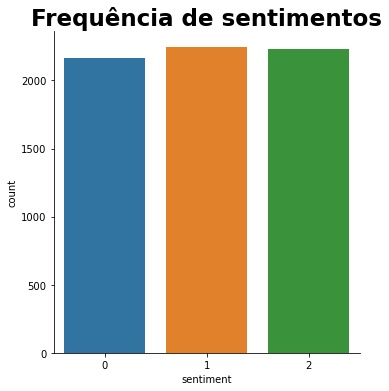

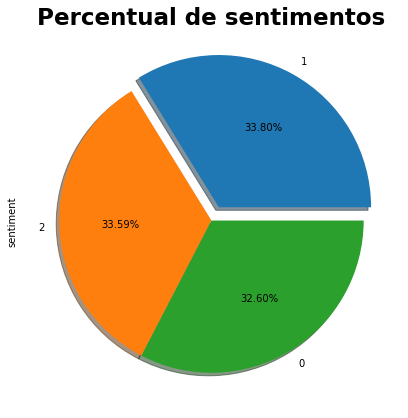

In [7]:
# Gráfico de barras de frequencia
sns.catplot(data=df_train, x='sentiment', kind='count')
plt.title('Frequência de sentimentos', size=23, weight='bold')
plt.show()
print('\n\n\n\n')

# Plotando o grágico com o percentual
plt.figure(figsize=(15,7))
plt.title('Percentual de sentimentos', weight='bold', size=23)
df_train['sentiment'].value_counts().plot(kind='pie',autopct='%1.2f%%', 
                                         explode = (0.1, 0, 0), shadow=True)
plt.show()

# Quebrando os dados em 0, 1 e 2

Nas células abaixo resolvi quebrar o DataFrame em cada um dos sentimentos e estabelecer novos datas, com o objetivo de observar cada um dos textos e ver se encontro padrões de textos para mais afrente aprimorar o modelo.

## Quebrando o Data Frame apenas com os sentimentos negativos

In [8]:
# Localizando o sentimento 0
df_0 = df_train.loc[df_train['sentiment'] == 0]
df_0['query_used'].value_counts() # Verificando a coluna 'query_used' para ver se tem alguma incongruência com o sentimento

:(    2168
Name: query_used, dtype: int64

In [9]:
# Verificando cada texto 
for text in df_0['tweet_text']:
    print(text)

@Maribasantiago O triste é pensar que provavelmente vai ser mais um caso que vão jogar por baixo dos tapetes, logo ele voltar como se nada tivesse acontecido. É sempre assim. :(
ah meu bebe to triste :( https://t.co/zESjLZiimt
@daiaczoqehdecz @policiafederal Mas eu não tenho idade pra consumir álcool moço :( Isso é alienação de menor sabia???
@marianafcosta3 67 dias a contar com fins de semana :(
Voltei pros dramas e já estou quase morrendo . Jennifer :( #Still17 https://t.co/rFv3Ht0yC8
#RoçaAFazenda Napaula tá brigando com tds :-( só não briga com a minha icone @eugabiprado
eu fico mto triste pq até hoje ninguém fez o jingle do ciro versão funk pra eu militar com minhas amiga :(
ele vai ta de rosinha no liev unhe :-(
@fideliuswift entendi fadx, mds seus pais são bolsominions eu sinto muito :(, deve ser horrivel, eu no seu lugar eu acho que não suportaria isso
Como me senti um lixo :(
😎 taekooka gostei da bio quase não vejo na tml :(
e você também era meu único! eu fico ainda tão soft 

@marques_loredo :( não tem graça
@Iuanstitches pq nao? :( eu to bem aa
@cherrywine55 amiga em joao pessoa ele perdeu :(
@O97SC Foi um amigo meu :( Ele disse que isso não se resolvia sem ir em fisio, ai não sei né. :( Mas médico ou amanhã ou até o fim da semana se tudo der certo!
dúvidas eternas :(
eu só queria esse fds de volta :(
(ainda tenho dificuldades em assistir jogo com Urgot, porque me lembra aranha mesmo tendo menos patas :( )
acordei de madrugada e fiquei vomitando, não sei o que aconteceu :(
eu tô tão exausta e não consigo dormir que odio :(
@ReVLXp @wagnermais10 @CrystinaFalget7 @g1 muito estranho! :(
Eu falei pro André que a corda no meu violão arrebentou e ele disse que o próprio violão não aguentou eu tocando :(
ai bts obrigada pelos mimos serio :((
o leãozinho :((( https://t.co/WM7d6RqtAE
@felipematheusSL O papoula vai ser de dia com a família jajsksjsjsj vai rolar miragem sim!! mas o bolo tá cancelado por motivos de falta de dinheiro :(
bar :-( : e7a33938-e5ce-4036-882

### Observação sentimento 0

- Foi possível perceber que na maioria dos textos de sentimento 0 (negativo), se não todos eles levam os caracteres especiais do tipo:  
:(, :(((, :-(, ...

In [10]:
# Verificando cada texto
contador = 0
for text in df_0['tweet_text']:
    text_exp = text.split() # .split() função usada para separar cada palavra de um texto pelo espaço e joga-las em uma lista
    for string in text_exp:
        if string == ':(' or string == ':((' or string == ':(((' or string == ':((((' or string == ':-(':
            contador += 1
            
contador # Nº de vezes que tais caracteres aparecem no texto

2084

In [11]:
# Tirando uma prova real e vendo se o caracter oposto se encontra em alguns dos textos e se sim quantos
contador = 0
for text in df_0['tweet_text']:
    text_exp = text.split() # .split() função usada para separar cada palavra de um texto pelo espaço e joga-las em uma lista
    for st in text_exp:
        if st == ':)' or st == ':))' or st == ':)))' or st == ':))))' or st == ':-)' or st == ':D' or st == ';)':
            contador += 1
            
contador # Nº de vezes que tais caracteres aparecem no texto

3

### Conclusão

- Visto que tais caracteres estão presentes em diversos textos acredito que **talvez** não deveria excluí-los pois é bem provável que a classificação melhore com tais caracteres **dado que eles representam um sentimento de tristeza** e o sentimento do texto é representado por **negativo**;


## Quebrando o Data Frame apenas com os sentimentos positivos

In [12]:
# Quebrando o Data Frame apenas com os sentimentos positivos
df_1 = df_train.loc[df_train['sentiment'] == 1]
df_1['query_used'].value_counts() # Verificando a coluna 'query_used' para ver se tem alguma incongruência com o sentimento

:)    2248
Name: query_used, dtype: int64

In [13]:
# Verificando cada texto 
for text in df_1['tweet_text']:
    print(text)

Então nunca vai saber quem eu sou... — Verdade,se revela :p https://t.co/MpI2R3nrc8
Conta uma história que você lembre com carinho. — Uma festa de aniversário surpresa que fizeram pra mim foi d+ Esse dia foi uma boa recordação :) https://t.co/WaMZgJbbBG
@laurafrosa20 Ninguém fala mal de ti :)
Vou calae vcs ahah :)
canhota com destrezas :-)
Eu mesma :)
@JaqueAndreta Dia 11 :) vc tbm é de outubro?
Isso, continuem a inventar mentiras sobre a praxe, que o pessoal que a experimenta percebe que é das melhores coisas da faculdade e acaba por aparecer todos os dias :)
@BabiFlu Nisso eu concordo em Grau número é gênero com você :)
É solteira ?? — Simsim :) https://t.co/fqZgmr2fqB
@727b8792r824 Borró esto :) https://t.co/t5YdTGwIfV
@ClaudiofcsSilva falou o jeca. Amigão, revise minha vida, quem sabe consegue superar :)
minha chave caiu no vão :)
@Loren_Ink @maiatck (Oioi, intrometendo aqui pra dar contesto, a Maia toca ukulele. Tchau :D)
Shazam é tudo de bom :)
@DedoGalactus @BAlexFernandes Bruno

### Observação sentimento 1

- Foi possível perceber que na maioria dos textos de sentimento 1 (positivo), se não todos eles levam os caracteres especiais do tipo:  
  :p, :), :D, :)), :))), ...:), :)))), :-), ^^, ;)

In [14]:
# Verificando cada texto
contador = 0
for text in df_1['tweet_text']:
    text_exp = text.split() # .split() função usada para separar cada palavra de um texto por espaço e joga-las em uma lista
    for st in text_exp:
        if st == ':)' or st == ':))' or st == ':)))' or st == ':))))' or st == ':-)' or st == ':D' or st == ';)':
            contador += 1
            
contador # Nº de vezes que tais caracteres aparecem no texto

2047

In [15]:
# Tirando uma prova real e vendo se o caracter oposto se encontra em alguns dos textos e se sim quantos
contador = 0
for text in df_1['tweet_text']:
    text_exp = text.split() # .split() função usada para separar cada palavra de um texto por espaço e joga-las em uma lista
    for string in text_exp:
        if string == ':(' or string == ':((' or string == ':(((' or string == ':((((' or string == ':-(':
            contador += 1
            
contador # Nº de vezes que tais caracteres aparecem no texto

4

### Conclusão

- Foi possível notar que o nº de caracteres opostos ao sentimento real do texto aparecem mais vezes na classificação 1 do que na classificação 0, porém ainda sim o nº de vezes em que isso acontece é irrelevante dado a quantidade de vezes em que o caracter correto aparece, continuo com a minha opinião de que **talvez** seja melhor **não remove-los**.

## Quebrando o Data Frame apenas com os sentimentos neutros

In [16]:
# Quebrando o Data Frame apenas com os sentimentos neutros
df_2 = df_train.loc[df_train['sentiment'] == 2]
df_2['query_used'].value_counts() # Verificando a coluna 'query_used' para ver se tem alguma incongruência com o sentimento

folha            343
estadao          260
g1               259
exame            253
#fato            243
#trabalho        212
#oportunidade    183
jornaloglobo     174
veja             153
#noticia          72
#novidade         51
#curiosidade      31
Name: query_used, dtype: int64

In [17]:
# Verificando cada texto 
for text in df_2['tweet_text']:
    print(text)

MUITO BOMMM!!!!!😂😂😂😂😂😂😂 #BOLSONARO2018 #BOLSONARO2TURNO #FATO https://t.co/vXPo0Tt4nz
Eu não sou melhor que ninguém, apenas aprendi a ser oque não via em mais ninguém. #BomDia #MeDedico #SempreFoiDeus #Trabalho em Farmácia Souza https://t.co/WyysAeo15U
Nesta sexta, dia 14, o #G1 e a rádio @CBNOficial entrevistam o candidato João Goulart Filho (PPL), a partir das 8h da manhã (horário de Brasília). Deixe sua pergunta nos comentários usando a hashtag #CBNG1. Veja a agenda de entrevistas com os candidatos https://t.co/r5ce04SGgW https://t.co/j90lYcUorE
5 de outubro, sexta-feira: veja o que vai ser assunto nesta sexta-feira: https://t.co/n8iXT6v8HY #G1
Veja o que é #FATO ou #FAKE nas entrevistas de Geraldo Alckmin para o Jornal Nacional e para o Jornal das Dez https://t.co/y4wRuYXCZ0
Elton John começa sua turnê de despedida dos palcos https://t.co/WpGQGcfjGC -via @EstadaoCultura https://t.co/Xm7H8HRTYF
&gt;@EstadaoPolitica Convicção de voto em Bolsonaro cresce impulsionada por voto masculin

### Observação sentimento 2

- A priore o que eu pude perceber com a manipulação de dados é que os textos de sentimento neutro geralmente possuem bastante https, já os filtros da coluna **'query_used'** (Filtro utilizado para buscar a publicação) não me ajudaram muito nessa ocasião.

In [18]:
# Verificando cada texto
contador = 0
for text in df_2['tweet_text']:
    text_exp = text.split() # .split() função usada para separar cada palavra de um texto por espaço e joga-las em uma lista
    for st in text_exp:
        if st == '#fato' or st == 'g1' or st == 'jornaloglobo' or st == 'veja' or st == '#trabalho' or st == 'exame':
            contador += 1
contador # Nº de vezes que tais caracteres aparecem no texto

257

### Conclusão

- Mesmo usando alguns dos **Filtros utilizados para buscar as publicações** não foi possível encontrar um padrão nos textos que determina o porque que tal texto é neutro, apenas foi possível perceber as repetições de recomendações de pag https nos textos, porém os outros sentimentos também tem tais https, logo não sei se deixar o https seria produtivo, o jeito é testar para ver;

## Pré-processamento e transformações

Decidi não remover as stopwords, pois como estamos buscando sentimento de dos textos, pode ser interessante manter as negações como por exemplo: **Não estou feliz** se eu decidir remover as stopwords o sentido mudaria.

Como os textos possuem varias palavras escritas erradas pois se trata de textos de post de redes sociais, acredito que **não vale a pena fazer a normalização dos dados**

O que eu decidi fazer:
- Fazer limpeza de texto, para que assim não tenha problemas na classificação;
    - Transformar todas as palavras para minúsculas;
    - Remover caracteres especiais (apenas os não relevantes);
    - Remover acentuação;
    - Reduzi todos os kkkkkk para k;
    - Deixei alguns caracteres para que melhore a classificação como: **:)**, **:(**, mas removi todas as repetiçoes para que torne a identificação dos caracteres mais simples;

In [19]:
# Criando um loop para ele tratar cada texto da coluna 'tweet_text'
new_tweet_text = []
for i in df_train['tweet_text']:
    i = i.lower() # Transformando todos as strings em minúsculas
    i = unidecode(i) # Removendo todos os acentos
    i = re.sub(r"[)]+", ')', i) # Deixei o ) devido a perceber que os textos de tal sentimento leva a carinha do sentimento
    i = re.sub(r"[(]+", '(', i) # Deixei o ( devido a perceber que os textos de tal sentimento leva a carinha do sentimento
    i = re.sub(r"[kkk]+", 'k', i) # Transformei todas as sequencias de risadas com kkk em um único k 
    i = re.sub(r"[^a-zA-Z0-9:()@_#-]+", ' ', i) # Removi todos os caracteres especiais que eu não considerei relevancia
    i = i.split() # Utilizei o ponto split() para fazer o processo do Token quebrando a string por espaço
    new_tweet_text.append(i) # Mandei todas as strings já tratadas para uma lista vazia

print(len(new_tweet_text)) # print para confimar se todos os dados vieram para a lista ou se alguns se perderam pelo caminho
new_tweet_text

6650


[['muito',
  'bommm',
  '#bolsonaro2018',
  '#bolsonaro2turno',
  '#fato',
  'https:',
  't',
  'co',
  'vxpo0tt4nz'],
 ['@maribasantiago',
  'o',
  'triste',
  'e',
  'pensar',
  'que',
  'provavelmente',
  'vai',
  'ser',
  'mais',
  'um',
  'caso',
  'que',
  'vao',
  'jogar',
  'por',
  'baixo',
  'dos',
  'tapetes',
  'logo',
  'ele',
  'voltar',
  'como',
  'se',
  'nada',
  'tivesse',
  'acontecido',
  'e',
  'sempre',
  'assim',
  ':('],
 ['eu',
  'nao',
  'sou',
  'melhor',
  'que',
  'ninguem',
  'apenas',
  'aprendi',
  'a',
  'ser',
  'oque',
  'nao',
  'via',
  'em',
  'mais',
  'ninguem',
  '#bomdia',
  '#mededico',
  '#semprefoideus',
  '#trabalho',
  'em',
  'farmacia',
  'souza',
  'https:',
  't',
  'co',
  'wyysaeo15u'],
 ['nesta',
  'sexta',
  'dia',
  '14',
  'o',
  '#g1',
  'e',
  'a',
  'radio',
  '@cbnoficial',
  'entrevistam',
  'o',
  'candidato',
  'joao',
  'goulart',
  'filho',
  '(ppl)',
  'a',
  'partir',
  'das',
  '8h',
  'da',
  'manha',
  '(horario',


In [20]:
# Criando a coluna com os dados tratatos
df_train['new_tweet_text'] = new_tweet_text
df_train

,id,tweet_text,tweet_date,sentiment,query_used,new_tweet_text
0,1051878536091439105,MUITO BOMMM!!!!!😂😂😂😂😂😂😂 #BOLSONARO2018 #BOLSON...,Mon Oct 15 16:52:40 +0000 2018,2,#fato,"[muito, bommm, #bolsonaro2018, #bolsonaro2turn..."
1,1046262272044208128,@Maribasantiago O triste é pensar que provavel...,Sun Sep 30 04:55:38 +0000 2018,0,:(,"[@maribasantiago, o, triste, e, pensar, que, p..."
2,1034393493907468289,"Eu não sou melhor que ninguém, apenas aprendi ...",Tue Aug 28 10:53:21 +0000 2018,2,#trabalho,"[eu, nao, sou, melhor, que, ninguem, apenas, a..."
3,1040374804442951680,"Nesta sexta, dia 14, o #G1 e a rádio @CBNOfici...",Thu Sep 13 23:00:57 +0000 2018,2,g1,"[nesta, sexta, dia, 14, o, #g1, e, a, radio, @..."
4,1048072497265033218,"5 de outubro, sexta-feira: veja o que vai ser ...",Fri Oct 05 04:48:50 +0000 2018,2,g1,"[5, de, outubro, sexta-feira:, veja, o, que, v..."
...,...,...,...,...,...,...
6645,1049269705528299520,@confinemi @lovatolionheart Eu também :( E ind...,Mon Oct 08 12:06:06 +0000 2018,0,:(,"[@confinemi, @lovatolionheart, eu, tambem, :(,..."
6646,1047473908524507136,Ok vida que segue vamos pensar em coisa boa e ...,Wed Oct 03 13:10:15 +0000 2018,1,:),"[ok, vida, que, segue, vamos, pensar, em, cois..."
6647,1045438934094946306,"gostasse da cartinha né :) — eu amei, tu é dem...",Thu Sep 27 22:23:59 +0000 2018,1,:),"[gostasse, da, cartinha, ne, :), --, eu, amei,..."
6648,1053028194125864966,"No 2º dia do @itforumexpo, a #Citrix Brasil co...",Thu Oct 18 21:01:00 +0000 2018,2,#trabalho,"[no, 2o, dia, do, @itforumexpo, a, #citrix, br..."


In [21]:
df_train['join_words'] = df_train['new_tweet_text'].apply(lambda x: ' '.join(x))
df_train

,id,tweet_text,tweet_date,sentiment,query_used,new_tweet_text,join_words
0,1051878536091439105,MUITO BOMMM!!!!!😂😂😂😂😂😂😂 #BOLSONARO2018 #BOLSON...,Mon Oct 15 16:52:40 +0000 2018,2,#fato,"[muito, bommm, #bolsonaro2018, #bolsonaro2turn...",muito bommm #bolsonaro2018 #bolsonaro2turno #f...
1,1046262272044208128,@Maribasantiago O triste é pensar que provavel...,Sun Sep 30 04:55:38 +0000 2018,0,:(,"[@maribasantiago, o, triste, e, pensar, que, p...",@maribasantiago o triste e pensar que provavel...
2,1034393493907468289,"Eu não sou melhor que ninguém, apenas aprendi ...",Tue Aug 28 10:53:21 +0000 2018,2,#trabalho,"[eu, nao, sou, melhor, que, ninguem, apenas, a...",eu nao sou melhor que ninguem apenas aprendi a...
3,1040374804442951680,"Nesta sexta, dia 14, o #G1 e a rádio @CBNOfici...",Thu Sep 13 23:00:57 +0000 2018,2,g1,"[nesta, sexta, dia, 14, o, #g1, e, a, radio, @...",nesta sexta dia 14 o #g1 e a radio @cbnoficial...
4,1048072497265033218,"5 de outubro, sexta-feira: veja o que vai ser ...",Fri Oct 05 04:48:50 +0000 2018,2,g1,"[5, de, outubro, sexta-feira:, veja, o, que, v...",5 de outubro sexta-feira: veja o que vai ser a...
...,...,...,...,...,...,...,...
6645,1049269705528299520,@confinemi @lovatolionheart Eu também :( E ind...,Mon Oct 08 12:06:06 +0000 2018,0,:(,"[@confinemi, @lovatolionheart, eu, tambem, :(,...",@confinemi @lovatolionheart eu tambem :( e ind...
6646,1047473908524507136,Ok vida que segue vamos pensar em coisa boa e ...,Wed Oct 03 13:10:15 +0000 2018,1,:),"[ok, vida, que, segue, vamos, pensar, em, cois...",ok vida que segue vamos pensar em coisa boa e ...
6647,1045438934094946306,"gostasse da cartinha né :) — eu amei, tu é dem...",Thu Sep 27 22:23:59 +0000 2018,1,:),"[gostasse, da, cartinha, ne, :), --, eu, amei,...",gostasse da cartinha ne :) -- eu amei tu e dem...
6648,1053028194125864966,"No 2º dia do @itforumexpo, a #Citrix Brasil co...",Thu Oct 18 21:01:00 +0000 2018,2,#trabalho,"[no, 2o, dia, do, @itforumexpo, a, #citrix, br...",no 2o dia do @itforumexpo a #citrix brasil con...


### Levantando o top 10 dos vocabulários mais repetitivos 

Fazendo tal levantamento pude perceber que faz sentido o **co** ser uma das palavras que mais apareceram, pois todo o https: tem um  **.co** que quando tratamos ele vira tal palavra, visto que eu acredito que não deva remover o https: dado que, se tem **:)** provavelmente é sentimento 1 e se tem **:(** provavelmente é sentimento 0, quando não tem carinha e possui um https: provavelmente é sentimento 2. Estou seguindo essa linha de raciocinio.

In [22]:
vocabulario = []
for frase in df_train['join_words']:
    for palavra in frase.split():
        
        #não queremos palavras de uma única letra
        if len(palavra) > 1:
            if palavra not in [x[0] for x in vocabulario]:
                vocabulario.append([palavra, 1])
            else:
                vocabulario[[x[0] for x in vocabulario].index(palavra)][1] += 1
            
print("\nO vocabulário é formado por N =", len(vocabulario), "palavras!")

#a partir do vocabulário, crio um dataframe com a contagem
vocab_count = pd.DataFrame({"palavra": [],
                            "count": []})

vocab_count["palavra"] = pd.Series(vocabulario).apply(lambda x: x[0])
vocab_count["count"] = pd.Series(vocabulario).apply(lambda x: x[1])
vocab_count = vocab_count.sort_values("count", ascending=False)
#
print("\nTemos a seguir as 10 mais comuns, com as respectivas contagens:")
display(vocab_count.head(10))


O vocabulário é formado por N = 21721 palavras!

Temos a seguir as 10 mais comuns, com as respectivas contagens:


,palavra,count
6,co,3623
5,https:,3619
71,de,2898
34,:(,2151
11,que,1861
164,:),1786
35,eu,1295
36,nao,1224
269,do,998
44,em,906


# CountVectorizer

O **CountVectorizer** é usado para converter uma coleção de documentos de texto em um vetor de contagens de termos / tokens.

Basicamente será classificado se tem ou não determinada palavra naquele texto em 0 e 1, para que dessa forma os algoritimos de **Machine Learning** possam entender o que cada texto possui e tente predizer o texto de acordo com o sentimento.

In [23]:
# Separando o modelo em treino e teste
X = df_train['join_words']
y = df_train['sentiment']

X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size = 0.3, 
                                                    random_state = 12)

# Instanciando o modelo
cv = CountVectorizer()

X_train_cv = cv.fit_transform(X_train).toarray()
X_test_cv = cv.transform(X_test).toarray()

In [24]:
# Lista de modelos que serão testados
random_seed = 12

list_models = [
{'model_name': 'Logistic Regression',
 'estimator' : LogisticRegression(random_state = random_seed)},
{'model_name': 'Decision Tree',
 'estimator' : DecisionTreeClassifier(random_state = random_seed)},
{'model_name': 'Random Forest',
 'estimator' : RandomForestClassifier(random_state = random_seed)}, 
{'model_name': 'LightGBM',
 'estimator' : lgb.LGBMClassifier(random_state = random_seed)}
]

# Função de teste de modelos
def test_models(model_list, col_model_name, col_model, X_train, X_test, y_train, y_test):
    for mdl in model_list:
        model = mdl[col_model]
        model.fit(X_train, y_train)
        y_predict = model.predict(X_test)
        print("Model      : %s" % mdl[col_model_name])
        print("Accuracy   : %0.4f " %  accuracy_score(y_test, y_predict))
        print("Precision  : %0.4f " % precision_score(y_test, y_predict, average='weighted'))
        print("Recall     : %0.4f " % recall_score(y_test, y_predict, average='weighted'))
        print("F1 - Score : %0.4f " % f1_score(y_test, y_predict, average='weighted'))
        print("======================")
        
# Função que instancia o modelo e já chama a matriz de confusão
def classification_e_matriz(model, titulo, X_tr, Xtest, y_train, y_test):
    
    best_model = model # Cria o modelo
    best_model.fit(X_tr, y_train) # Instanciando o modelo 
    y_pred = best_model.predict(Xtest) # Predizendo

    # Mostra o classification_report
    print(classification_report(y_test, y_pred))

    # Chama a matriz de confusão
    cm = confusion_matrix(y_test, y_pred)

    plot_confusion_matrix(conf_mat=cm)
    plt.title(titulo , weight='bold', fontsize=20)
    plt.show()
    
    return best_model

def y_pred(model, X_tr, X_test):
    
    best_model = model # Cria o modelo
    best_model.fit(X_tr, y_train) # Instanciando o modelo 
    y_pred = best_model.predict(X_test) # Predizendo
    
    return y_pred

In [25]:
test_models(list_models,
           "model_name",
           "estimator",
           X_train_cv,
           X_test_cv,
           y_train,
           y_test)

Model      : Logistic Regression
Accuracy   : 0.7805 
Precision  : 0.7788 
Recall     : 0.7805 
F1 - Score : 0.7793 
Model      : Decision Tree
Accuracy   : 0.7143 
Precision  : 0.7125 
Recall     : 0.7143 
F1 - Score : 0.7133 
Model      : Random Forest
Accuracy   : 0.7514 
Precision  : 0.7481 
Recall     : 0.7514 
F1 - Score : 0.7491 
Model      : LightGBM
Accuracy   : 0.7479 
Precision  : 0.7434 
Recall     : 0.7479 
F1 - Score : 0.7453 


# TF-IDF

**Term Frequency and Inverse Document Frequency** é uma tranformação muito conhecida, onde avaliamos a relevância das palavras pelo **Frequência dos Termos** multiplicado pelo **Inverso da Frequência nos Documentos**, onde **documento** é cada um dos textos dentro de um Dataset.

> **TF - Term Frequency**: é a frequência de vezes que um termo/palavra aparece em cada um dos documentos analisados (isso nos ajuda a avaliar a relevância daquela palavra);

> **IDF - Inverse Document Frequency**: aqui avaliamos em quantos documentos o termo/palavra aparece (dessa forma conseguimos entender a sua influência em identificar os textos);

In [26]:
tfidf = TfidfVectorizer(use_idf = True)

X_train_tfidf = tfidf.fit_transform(X_train).todense()
X_test_tfidf  = tfidf.transform(X_test).todense()

In [27]:
X_train_tfidf

matrix([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]])

In [28]:
test_models(list_models,
           "model_name",
           "estimator",
           X_train_tfidf,
           X_test_tfidf,
           y_train,
           y_test)

Model      : Logistic Regression
Accuracy   : 0.7584 
Precision  : 0.7524 
Recall     : 0.7584 
F1 - Score : 0.7523 
Model      : Decision Tree
Accuracy   : 0.6627 
Precision  : 0.6639 
Recall     : 0.6627 
F1 - Score : 0.6620 
Model      : Random Forest
Accuracy   : 0.7383 
Precision  : 0.7411 
Recall     : 0.7383 
F1 - Score : 0.7361 
Model      : LightGBM
Accuracy   : 0.7283 
Precision  : 0.7266 
Recall     : 0.7283 
F1 - Score : 0.7272 


# Otimização de hiperparametros

De acordo com o tamanho da base de dados, para que a tenha um **menor custo computacional** decidi aplicar a técnica **RandomizedSearchCV**, pois o modelo **RandomizedSearchCV** testa **algumas combinações aleatórias dos parâmetros**, onde definimos a quantidade de iterações desse processo ele irá processar. A partir das combinações, o RandomizedSearchCV realiza o mesmo processo do GridSearchCV, faz o **Cross Validation** e **calcula a métrica de acompanhamento**, por fim defini qual a melhor combinação de parâmetros.

Desta forma assume um custo computacional 

              precision    recall  f1-score   support

           0       0.69      0.72      0.70       637
           1       0.72      0.67      0.69       701
           2       0.93      0.96      0.94       657

    accuracy                           0.78      1995
   macro avg       0.78      0.78      0.78      1995
weighted avg       0.78      0.78      0.78      1995



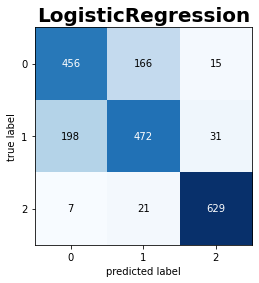

In [29]:
# Plotando a matriz de confusão, instanciando o melhor modelo e predizendo
best_model = classification_e_matriz(LogisticRegression(random_state = random_seed), 'LogisticRegression', 
                        X_tr=X_train_cv, Xtest=X_test_cv, y_train=y_train, y_test=y_test)
y_pred = y_pred(LogisticRegression(random_state = random_seed), X_tr=X_train_cv, X_test=X_test_cv)

Para fazermos o __RandomizedSearchCV__ vamos definir os __parâmetros__ que vamos variar e para quais valores vamos testar:

In [30]:
pprint("Parâmetros da Regressão Logística:")
pprint(best_model.get_params())

'Parâmetros da Regressão Logística:'
{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': 12,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}


In [33]:
# Máximo de interações
max_iter = [int(x) for x in np.linspace(start = 100, stop = 2000, num = 7)]

# Escolhi o saga pois permite teste de diversas penalidades
solver = ['saga']

# Todas as penalidades possíveis pelo metodo saga
penalty = ['elasticnet', 'l1', 'l2', None]

# Create the random grid
params_grid = {'solver': solver,
               'penalty': penalty,
               'max_iter': max_iter}

pprint(params_grid)

{'max_iter': [100, 416, 733, 1050, 1366, 1683, 2000],
 'penalty': ['elasticnet', 'l1', 'l2', None],
 'solver': ['saga']}


In [34]:
random_search = RandomizedSearchCV(estimator = best_model, 
                                   param_distributions = params_grid, 
                                   n_iter = 100, 
                                   cv = 3, 
                                   verbose=2,
                                   n_jobs = -1)

In [35]:
%%time

random_search.fit(X_train_cv, y_train)

Fitting 3 folds for each of 28 candidates, totalling 84 fits
Wall time: 1h 36min 25s


RandomizedSearchCV(cv=3, estimator=LogisticRegression(random_state=12),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'max_iter': [100, 416, 733, 1050, 1366,
                                                     1683, 2000],
                                        'penalty': ['elasticnet', 'l1', 'l2',
                                                    None],
                                        'solver': ['saga']},
                   verbose=2)

In [38]:
random_search.best_params_

{'solver': 'saga', 'penalty': 'l2', 'max_iter': 100}

              precision    recall  f1-score   support

           0       0.68      0.71      0.69       637
           1       0.72      0.66      0.69       701
           2       0.92      0.96      0.94       657

    accuracy                           0.78      1995
   macro avg       0.77      0.78      0.78      1995
weighted avg       0.77      0.78      0.77      1995



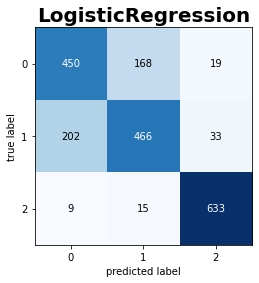

In [40]:
model = classification_e_matriz(LogisticRegression(random_state = random_seed, solver='saga',
                                                  penalty='l2'), 'LogisticRegression', 
                        X_tr=X_train_cv, Xtest=X_test_cv, y_train=y_train, y_test=y_test)

### Conclusão da otimização de hiperparametros

Na otimização acabou que o modelo **perdeu um pouco de precisão** na classificação do 0 e 1, porém deu uma melhora da na classificação 2, mas de acordo com a matriz de confusão o primeiro modelo, sem os testes de randomsearch, classificou melhor.

**Observações**
Obviamente se eu tivesse feito um nº maior de testes seria possível que os testes encontrassem uma combinão que melhor de ajuste com os dados, mas haveria um **custo computacional gigantesco para ganhar poucos % de acurácia**, atrasaria a entrega do projeto e perderia completamente o sentido na minha opinião.

# Simulação dos dados em produção

Para que o resultado seja congruente é necessario tratar a base de dados da mesma forma que foi tratada base de treino.

In [120]:
# Criando um loop para ele tratar cada texto da coluna 'tweet_text'
new_tweet_text = []
for i in df_test['tweet_text']:
    i = i.lower() # Transformando todos as strings em minúsculas
    i = unidecode(i) # Removendo todos os acentos
    i = re.sub(r"[)]+", ')', i) # Deixei o ) devido a perceber que os textos de tal sentimento leva a carinha do sentimento
    i = re.sub(r"[(]+", '(', i) # Deixei o ( devido a perceber que os textos de tal sentimento leva a carinha do sentimento
    i = re.sub(r"[kkk]+", 'k', i) # Transformei todas as sequencias de risadas com kkk em um único k 
    i = re.sub(r"[^a-zA-Z0-9:()@_#-]+", ' ', i) # Removi todos os caracteres especiais que eu não considerei relevancia
    i = i.split() # Utilizei o ponto split() para fazer o processo do Token quebrando a string por espaço
    new_tweet_text.append(i) # Mandei todas as strings já tratadas para uma lista vazia

# Criando a coluna com os dados tratatos
df_test['new_tweet_text'] = new_tweet_text

df_test['join_words'] = df_test['new_tweet_text'].apply(lambda x: ' '.join(x))

df_test.loc[df_test['query_used'] == ':(', 'sentiment'] = 0
df_test.loc[df_test['query_used'] == ':)', 'sentiment'] = 1
df_test.loc[(df_test['query_used'] != ':(') & (df_test['query_used'] != ':)'), 'sentiment'] = 2
df_test

,id,tweet_text,tweet_date,query_used,new_tweet_text,join_words,sentiment
0,1046764676707753987,Apartamento Vila Mariana Praça Monteiro dos Sa...,Mon Oct 01 14:12:01 +0000 2018,:),"[apartamento, vila, mariana, praca, monteiro, ...",apartamento vila mariana praca monteiro dos sa...,1.0
1,1047329264943751169,@FalleNCS @BrasilGameShow quero 1x1 de scout. ...,Wed Oct 03 03:35:29 +0000 2018,:),"[@fallencs, @brasilgameshow, quero, 1x1, de, s...",@fallencs @brasilgameshow quero 1x1 de scout d...,1.0
2,1045443874947313665,mais uma analógica no correio à minha espera :...,Thu Sep 27 22:43:37 +0000 2018,:),"[mais, uma, analogica, no, correio, a, minha, ...",mais uma analogica no correio a minha espera :...,1.0
3,1040484298711814144,"Em festa de posse como presidente do STF, Toff...",Fri Sep 14 06:16:02 +0000 2018,folha,"[em, festa, de, posse, como, presidente, do, s...",em festa de posse como presidente do stf toffo...,2.0
4,1045411876887306240,@thethiagor @jubsilva @GSCISA @GrupoMulheRIs A...,Thu Sep 27 20:36:28 +0000 2018,:),"[@thethiagor, @jubsilva, @gscisa, @grupomulher...",@thethiagor @jubsilva @gscisa @grupomulheris a...,1.0
...,...,...,...,...,...,...,...
4995,1049243861732794369,"Não é nada demais , apenas a verdade :) — Oh.....",Mon Oct 08 10:23:25 +0000 2018,:),"[nao, e, nada, demais, apenas, a, verdade, :),...",nao e nada demais apenas a verdade :) -- oh pr...,1.0
4996,1039334757690163201,Veja o que é #FATO ou #FAKE na entrevista de A...,Tue Sep 11 02:08:10 +0000 2018,#fato,"[veja, o, que, e, #fato, ou, #fake, na, entrev...",veja o que e #fato ou #fake na entrevista de a...,2.0
4997,1049286902577356801,"@nattvieiira de quem???? queria ver, eu sai po...",Mon Oct 08 13:14:27 +0000 2018,:(,"[@nattvieiira, de, quem, queria, ver, eu, sai,...",@nattvieiira de quem queria ver eu sai por cau...,0.0
4998,1045349300744671232,ASSASSIN'S CREED ORIGINS: ENFRENTANDO OS IRMÃO...,Thu Sep 27 16:27:49 +0000 2018,:),"[assassin, s, creed, origins:, enfrentando, os...",assassin s creed origins: enfrentando os irmao...,1.0


              precision    recall  f1-score   support

         0.0       0.70      0.72      0.71      1637
         1.0       0.69      0.67      0.68      1656
         2.0       0.95      0.96      0.95      1707

    accuracy                           0.78      5000
   macro avg       0.78      0.78      0.78      5000
weighted avg       0.78      0.78      0.78      5000



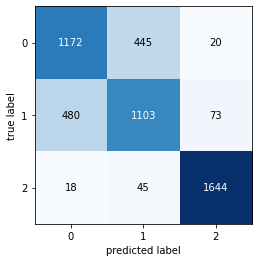

In [122]:
y_test = df_test['sentiment']
pipeline = Pipeline([('cv', CountVectorizer()),
                     ('model', LogisticRegression(random_state = random_seed))])
pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(predicao)

# Mostra o classification_report
print(classification_report(y_test, y_pred))

# Cria a matriz de confusão
cm = confusion_matrix(y_test, y_pred)

# plot da matriz de confusão
plot_confusion_matrix(conf_mat=cm)

# Mostra o gráfico
plt.show()

# Conclusão

Visto que o modelo teve uma acurácia de **78%** ele se tornou possivel sim prever os sentimentos dos textos, visto que como visto nas conclusões acima existem certos padrões em cada sentimento de texto.

Infelizmente não foi possível treinar com a base de treinos completa, **tive muitos problemas com a memória do meu pc**, então tive que improvisar e provavalmente esse problema interfiriu no aprendizado do modelo.

**Observações**  
Quando o arquivo rodar na sua máquina é provável que o resultado não seja exatamente igual, pois a forma como eu reduzi os dados foi usando o .sample(), logo os dados de treino são **selecionados aleatoriamente**, de acordo com os testes que eu fiz a diferença que da é bem próxima, mas não deixa de ter diferença. Escolhi o sample(), para que a distribuição dos dados não se perdesse, acredito que selecionar os dados de forma aleatoria seria a forma mais lógica para mante-los por igual.

**Agradecimentos**  
Agradeço por todo o conteúdo apresentado no módulo, foi muito enriquecedor e na minha opinião o melhor módulo até o momento, estou pensando seriamente em aprofundar os meus conhecimentos em **Machine Learning** e **Deep Learning**, buscar uma especialização na area, obrigado.